# 1.
Добавьте в таблицу station_stat_multi столбец good_time_spent из данных good_stations_stat.
Распечатайте матрицу корреляции для station_stat_multi. Постройте диаграммы рассеяния попарно для всех величин методом scatter_matrix. Задайте размер 9х9 дюймов.

Подсказка
Скопируйте из good_stations_stat данные из столбца с длительностью заезда в столбец station_stat_multi['good_time_spent']. Распечатайте матрицу корреляции, вызвав метод corr(). Постройте попарные диаграммы рассеяния методом plotting.scatter_matrix(), задайте размер параметром figsize.

                 time_spent  too_fast  too_slow  good_time_spent
time_spent         1.000000 -0.640658  0.802247         0.702429
too_fast          -0.640658  1.000000 -0.255876        -0.315120
too_slow           0.802247 -0.255876  1.000000         0.445926
good_time_spent    0.702429 -0.315120  0.445926         1.000000


array([[<AxesSubplot:xlabel='time_spent', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='time_spent'>,
        <AxesSubplot:xlabel='good_time_spent', ylabel='time_spent'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_fast'>,
        <AxesSubplot:xlabel='good_time_spent', ylabel='too_fast'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_slow'>,
        <AxesSubplot:xlabel='good_time_spent', ylabel='too_slow'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='good_time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='good_time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='good_time_spent'>,
        <AxesSubplot:xlabel='good_time_

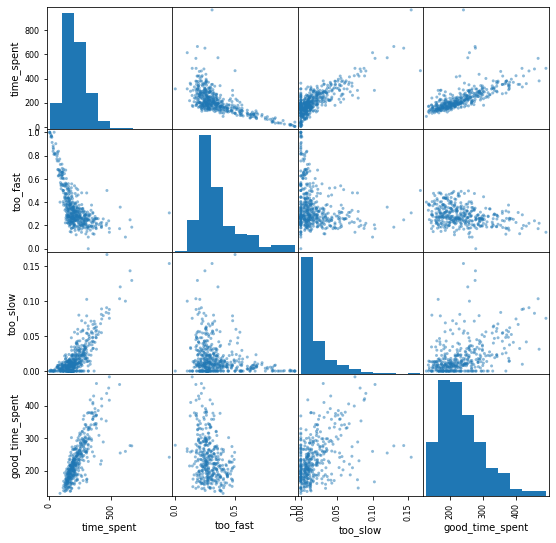

In [3]:
import pandas as pd

data = pd.read_csv('../datasets/visits.csv', sep='\t')

# фильтруем слишком быстрые и медленные заезды и АЗС
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000
too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

# считаем данные по отдельным АЗС и по сетям
station_stat = data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')
stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_stations_stat)

station_stat_multi = data.pivot_table(index='id', values=['time_spent', 'too_fast', 'too_slow'])
station_stat_multi['good_time_spent'] = good_stations_stat['time_spent']
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9,9))